# Проект "Принятие решений в бизнесе на основе данных"

## Описание задачи от заказчика


В Москве открывается кафе в котором гостей будут обслуживать роботы. Проект перспективный, но потребует больших вложений.
В распоряжении имеются открытые данные о заведениях общественного питания в Москве. 

Необходимо ответить на вопрос:
 - Будет ли достаточной посещаемость кафе в долгой перспективе, после спада первоначального интереса?

Также необходимо сформировать рекомендации:
 - Какое место расположения будет самым перспективным
 - Заведение какого вида будут самыми перспективными
 - Какое количество посадочных мест в кафе будет оптимальным

Ссылка на презентацию: https://drive.google.com/file/d/1ST5sWm0tGK_nbYa7OniaGa9Whzc5ChBI/view?usp=sharing

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import math
import __main__
from scipy import stats as st
import numpy as np
import seaborn as sns
import datetime as dt
import plotly.express as px 
from plotly import graph_objects as go
from io import BytesIO
import requests

### Импорт данных

In [2]:
raw_data = pd.read_csv('/datasets/rest_data.csv')
display(raw_data.head())

for i in raw_data:
    display(raw_data[i].value_counts())

raw_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


27662     1
223307    1
185071    1
23278     1
21451     1
         ..
155041    1
21920     1
107934    1
26006     1
163840    1
Name: id, Length: 15366, dtype: int64

Столовая                      267
Кафе                          236
Шаурма                        234
KFC                           155
Шоколадница                   142
                             ... 
Буше                            1
Батоно                          1
Сыто пьяно                      1
Лобби-Бар «У фонтана»           1
ФИЛИАЛ ШБС ЛЮБЛИНО ШК. 493      1
Name: object_name, Length: 10393, dtype: int64

нет    12398
да      2968
Name: chain, dtype: int64

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

город Москва, Ходынский бульвар, дом 4             95
город Москва, Пресненская набережная, дом 2        63
город Москва, проспект Мира, дом 211, корпус 2     60
город Москва, Кировоградская улица, дом 13А        53
город Москва, площадь Киевского Вокзала, дом 2     48
                                                   ..
город Москва, Пятницкое шоссе, дом 25, корпус 2     1
город Москва, город Зеленоград, корпус 1426         1
город Москва, Малая Бронная улица, дом 27/14        1
город Москва, 3-я Тверская-Ямская улица, дом 15     1
город Москва, Бирюлёвская улица, владение 3         1
Name: address, Length: 9108, dtype: int64

0      1621
40      835
20      727
30      685
10      644
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Описание данных в таблице:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Все в порядке со столбцами "id", "chain", "object_type", "address"- тип данных корректный, пропусков нет. Дублей в столбце "id" нет, а в столбцах "number" и "address" они допустимы. 

В столбце "object_name" названия записаны в разном регистре, а также в данных могут быть дубли.

В столбце "number" все в порядке с типом данных, пропусков нет, однако встречаются нулевые значения, которые желательно обработать. Также этот столбец стоит проверить на выбросы, т.к. встречаются заведения с количеством посадочных мест более 600 и они могут повлиять на результаты анализа.

Приводить столбцы с типом object к типу categorial не будем, т.к. объем исходных данных небольшой и позволяет эффективно решать задачи с типом данных object. Однако , если в ходе проекта такая необходимость появится - сделаем преобразование.



### Заполнение пропусков

Проверим данные на пропуски.

In [3]:
for i in raw_data.columns.to_list():
    print('Количество строк в столбце',i,'равно:',raw_data[raw_data[i].isna()][i].count())

Количество строк в столбце id равно: 0
Количество строк в столбце object_name равно: 0
Количество строк в столбце chain равно: 0
Количество строк в столбце object_type равно: 0
Количество строк в столбце address равно: 0
Количество строк в столбце number равно: 0


Отлично, пропусков в данных нет.

### Удаление дублей

Перед проверкой на дубли приведем все названия объектов к нижнему регистру. Также приведем к нижнему регистру столбец с адресами. 
    

In [4]:
raw_data['object_name'] = raw_data['object_name'].str.lower()
raw_data['address'] = raw_data['address'].str.lower()
display(raw_data.head())

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Теперь проверим таблицу на дубли. Дублями в данной задаче будем считать такие строки, для которых совпадают поля "object_name" и "address" - другими словами, если заведения называются одинаково и находятся по одному и тому же адресу, с точностью до дома, то мы считаем это за одно и тоже заведение.

In [5]:
print('Количество дублей для сочетаний "название" + "адрес" :',raw_data.duplicated(subset = ['object_name','address']).sum())
display(raw_data[raw_data.duplicated(subset = ['object_name','address'])].head(50))

Количество дублей для сочетаний "название" + "адрес" : 225


,id,object_name,chain,object_type,address,number
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",12
579,149227,общественное питание,нет,столовая,"город москва, павелецкая площадь, дом 1",70
580,149205,общественное питание,нет,кафе,"город москва, павелецкая площадь, дом 1",35
581,149131,общественное питание,нет,кафе,"город москва, павелецкая площадь, дом 1",39
1409,151267,альфорно,нет,кафе,"город москва, город зеленоград, корпус 438",45
1648,151871,ресторан «практика by darvin»,нет,кафе,"город москва, большая грузинская улица, дом 37...",50
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",150
2376,28605,комбинат питания мгту им.н.э.баумана,нет,кафетерий,"город москва, 2-я бауманская улица, дом 5, стр...",35
2377,28606,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, 2-я бауманская улица, дом 5, стр...",16


Очевидно, что не все строки таблицы на самом деле являются дублями. Например "комбинат питания мгту им.н.э.баумана" действительно может быть представлена заведениями двух разных типов - "буфет" и "столовая" с разным количеством посадочных мест, но одним названием и адресом. Поэтому искать и удалять дубли будем по сочетанию "название"+"адрес"+"тип заведения".

Также в данных есть очевидные дубли: 7 заведений "lift", находящихся по одному адресу и имеющих разные посадочные места. Вероятнее всего это связано с тем, что открытые данные аккумулируют в себе значения за несколько лет и это заведение могло расширятся или, наоборот, уменьшать количество посадочных мест. Также, скорее всего, id для заведений присваиваются в хронологическом порядке, поэтому за текущее количество посадочных мест возьмем значение с наибольшим id. Для этого при и удалении дублей будем сортировать data по столбцу "id" в порядке убывания.

In [6]:
data = raw_data.sort_values(by='id',ascending = False).drop_duplicates(subset = ['object_name','address','object_type'])
raw_data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15182 entries, 13580 to 1611
Data columns (total 6 columns):
id             15182 non-null int64
object_name    15182 non-null object
chain          15182 non-null object
object_type    15182 non-null object
address        15182 non-null object
number         15182 non-null int64
dtypes: int64(2), object(4)
memory usage: 830.3+ KB


Теперь разберемся с нулями в столбце "number". Посмотрим на заведения без посадочных мест.

In [7]:
display(data[data['number']==0])

,id,object_name,chain,object_type,address,number
13580,223439,донер кебаб,нет,предприятие быстрого обслуживания,"город москва, ленинский проспект, дом 39/1",0
14293,223437,шаурма,нет,предприятие быстрого обслуживания,"город москва, ломоносовский проспект, владение...",0
14307,223436,донер кебаб,нет,предприятие быстрого обслуживания,"город москва, ломоносовский проспект, дом 19а",0
13629,223403,"выпечка, шаурма",нет,магазин (отдел кулинарии),"город москва, бульвар маршала рокоссовского, д...",0
13587,223394,шаурма,нет,предприятие быстрого обслуживания,"город москва, мукомольный проезд, дом 11",0
...,...,...,...,...,...,...
7636,21159,буфет «мцби»,нет,буфет,"город москва, варшавское шоссе, дом 118, корпус 1",0
4280,20910,буфет при вузе,нет,буфет,"город москва, улица рождественка, дом 11, стро...",0
3596,20869,буфет,нет,буфет,"город москва, 2-я брестская улица, дом 6",0
4751,20562,лаваш-центр,нет,закусочная,"город москва, улица рогожский вал, дом 6, корп...",0


Получается, что заведения с нулевым количеством посадочных мест - это еда на вынос. Конечно, среди нулей могут встречаться и ошибочные значения, однако данных не хватает, что бы достоверно проверить это. Поэтому, установим допущение, что все заведения со значениями 0 в столбце "number" - заведения с едой на вынос. 

Разделим все данные на две категории: "еда на вынос" и "есть посадочные места" для получения дополнительной аналитики.

Будем держать в фокусе внимания эти группы и, в случае их аномального поведения, применим необходимые меры. 

In [8]:
def categorized (a):
    if a['number']>0:
        return 'есть посадочные места'
    else:
        return 'на вынос'
    
data['format_category'] = data.apply(categorized,axis=1)
data = data.reset_index(drop=True)
display(data.head())
data.info()

,id,object_name,chain,object_type,address,number,format_category
0,223439,донер кебаб,нет,предприятие быстрого обслуживания,"город москва, ленинский проспект, дом 39/1",0,на вынос
1,223438,тандыр хачапури,нет,предприятие быстрого обслуживания,"город москва, ломоносовский проспект, дом 23а",3,есть посадочные места
2,223437,шаурма,нет,предприятие быстрого обслуживания,"город москва, ломоносовский проспект, владение...",0,на вынос
3,223436,донер кебаб,нет,предприятие быстрого обслуживания,"город москва, ломоносовский проспект, дом 19а",0,на вынос
4,223435,кофейня magic,нет,предприятие быстрого обслуживания,"город москва, болотниковская улица, дом 12",6,есть посадочные места


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 7 columns):
id                 15182 non-null int64
object_name        15182 non-null object
chain              15182 non-null object
object_type        15182 non-null object
address            15182 non-null object
number             15182 non-null int64
format_category    15182 non-null object
dtypes: int64(2), object(5)
memory usage: 830.4+ KB


### Вывод

Данные проверены и готовы к анализу.Заказчику будет передана рекомендация: проверить, есть ли возможность из источника данных получить год, за который указаны соотвествующие измерения. 

## Анализ данных

Проанализируем количество заведений каждого вида. Для этого построим гистограмму распределения. 

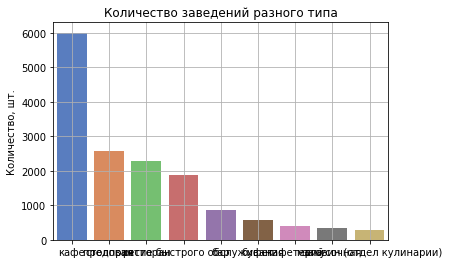

In [9]:
plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted')
fig = sns.barplot(x='object_type', y='id', data=data.groupby('object_type')['id'].count().reset_index().sort_values(by='id',ascending=False))
plt.xticks()
plt.title('Количество заведений разного типа')
plt.xlabel('')
plt.ylabel('Количество, шт.')
plt.grid()
plt.show()

Изменим названия типов заведений для удобства размещения подписей на графиках:
 - "предприятие быстрого обслуживания" изменим на "фастфуд"
 - "магазин (отдел кулинарии)" изменим на "магазин"

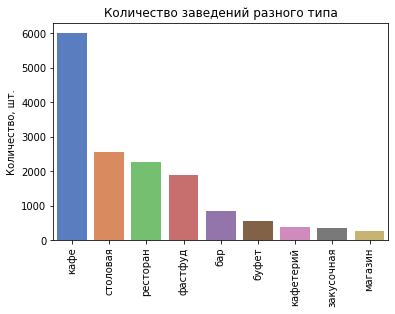

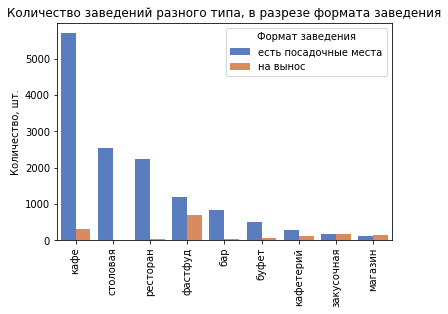

In [10]:
data['object_type'] = data['object_type'].replace({'предприятие быстрого обслуживания':'фастфуд','магазин (отдел кулинарии)':'магазин'})

plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='object_type', y='id', data=data.groupby('object_type')['id'].count().reset_index().sort_values(by='id',ascending=False))
plt.xticks(rotation=90)
plt.title('Количество заведений разного типа')
plt.xlabel('')
plt.ylabel('Количество, шт.')
plt.show()

plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='object_type', y='id', data=data.groupby(['object_type','format_category'])['id'].count().reset_index().sort_values(by='id',ascending=False),hue='format_category')
plt.xticks(rotation=90)
plt.title('Количество заведений разного типа, в разрезе формата заведения')
plt.xlabel('')
plt.legend(title='Формат заведения')
plt.ylabel('Количество, шт.')
plt.show()

Из графика "Количество заведений разного типа" видно, что больше всего заведений типа "кафе" (около 6000). Вероятно, это связано с юридическими ограничениями, которые накладываются при выборе типа заведения. С точки юридической точки зрения кафе имеет преимущество. Однако, юридические требования в данной задаче более четко разделяют типы заведений между собой, поэтому это позволит нам сделать анализ более точным. 

На удивление, очень мало баров (~1000 шт). Возможно, это также связано с юридическими ограничениями.

Меньше всего заведений с типом "магазин" - это отделы кулинарии в магазинах. Вероятно, это связано с тем, что крупные сети не выделяют кулинарные отделы в отдельное заведение, иначе их было бы гораздо больше. 

**Больше всего заведений типа "Кафе" (около 6000 шт). На втором месте по популярности столовые (~ 2500 шт) и с небольшим отставанием на третьем рестораны (~ 2200 шт) . Однако вряд-ли посетители пойдут в "столовую" с роботами, поэтому также обратим внимание на заведения с типом "фастфуд" - их также около 2000 шт.**

Также видно, что преобладают заведения с посадочными местами. Исключение составляет фастфуд, около 60% которых все таки реализуют продукцию только на вынос. 


Теперь посмотрим на график соотношения сетевых и несетевых заведений.

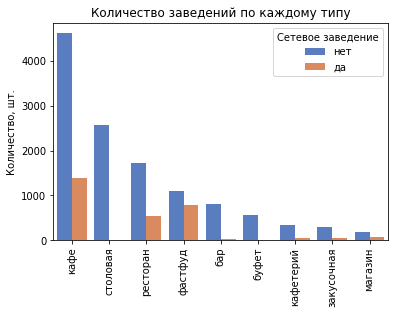

Количество несетевых и сетевых заведений:
нет    12234
да      2948
Name: chain, dtype: int64


In [11]:
plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
sns.barplot(
    x='object_type',
    y='id',
    data=data.pivot_table(index=['object_type','chain'],aggfunc='count',values='id').reset_index().sort_values(by='id',ascending=False),
    hue='chain'
)
plt.xticks(rotation=90)
plt.title('Количество заведений по каждому типу')
plt.xlabel('')
plt.legend(title='Сетевое заведение')
plt.ylabel('Количество, шт.')
plt.show()

print('Количество несетевых и сетевых заведений:')
print(data['chain'].value_counts())

Из графика "Количество заведений по каждому типу" видно, что несетевых заведений  больше более чем в 4 раза, чем сетевых.
В основном сетевыми заведениями бывают кафе, фастфуд и рестораны. 

Остальные заведения либо вообще не бывают сетевыми либо бывают, но таких крайне мало (всех вместе менее 200 шт). 

Привыборе заведения разного типа вероятность, что оно окажется сетевым составит: 
Для кафе или ресторана - ~33%
Для фастфуда - ~75%
Для всех остальных типов менее 10%.

**Таким образом, лучше всего открывать заведение типа "кафе", "ресторан" или "фастфуд"**

Есть ли преимущества у сетевых заведений рассмотрим далее.

In [12]:
# Код ревьюера
chain_by_rest_type = data.groupby('object_type').apply(lambda x: pd.Series(dict(
    chained=(x.chain == 'да').sum(),
    not_chained=(x.chain == 'нет').sum(),
    total =x.id.count()
)))


chain_by_rest_type = chain_by_rest_type.reset_index()
chain_by_rest_type['chained_share'] = chain_by_rest_type['chained']/chain_by_rest_type['total']*100
chain_by_rest_type['not_chained_share'] = chain_by_rest_type['not_chained']/chain_by_rest_type['total']*100

chain_by_rest_type.sort_values(by='chained_share', ascending=False)

,object_type,chained,not_chained,total,chained_share,not_chained_share
8,фастфуд,784,1106,1890,41.481481,58.518519
5,магазин,78,194,272,28.676471,71.323529
6,ресторан,541,1733,2274,23.790677,76.209323
3,кафе,1387,4621,6008,23.085885,76.914115
2,закусочная,56,291,347,16.138329,83.861671
4,кафетерий,51,342,393,12.977099,87.022901
0,бар,37,816,853,4.337632,95.662368
1,буфет,11,559,570,1.929825,98.070175
7,столовая,3,2572,2575,0.116505,99.883495


Рассмотрим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Разделим все сетевые заведения на пять групп: 

1 - Большое количество филиалов и большое количество посадочных мест

2 - Большое количество филиалов и малое количество посадочных мест

3 - Малое количество филиалов и большое количество посадочных мест

4 - Малое количество филиалов и малое количество посадочных мест

5 - Среднее количество филиалов и среднее количество посадочных мест

"Большим" будем считать значение третьего квартиля соотвествующего показателя. За "малое" количество возьмем первый квартиль соответсвующего показателя. За среднее количество будем считать диапазон значений между первым и третьим квартилем.

 Установим допущение, что малое количество мест - количество мест, меньше первого квартиля

2.0
7.5
20.0
85.0


,object_name,id,number,group
0,bocconcino,3,68.0,5
1,burger club,3,20.0,5
2,coffeeshop company,4,50.0,5
3,cofix,25,10.0,2
4,correas,3,32.0,5
...,...,...,...,...
238,шоколадница,154,50.0,5
239,штолле,13,25.0,5
240,якитория,38,98.0,1
241,япоша,2,105.0,3


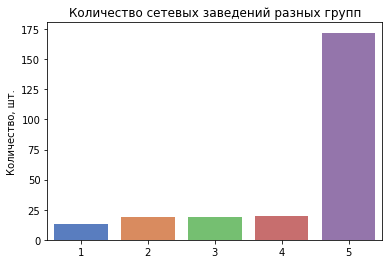

In [13]:
data_grouped = data.query('chain=="да"').groupby('object_name').agg({'id':'count','number':'median'}).query('id>1').reset_index()

q1_obj = data_grouped['id'].quantile(0.25)
q3_obj = data_grouped['id'].quantile(0.75)
q1_seats = data_grouped['number'].quantile(0.25)
q3_seats = data_grouped['number'].quantile(0.75)

print(q1_obj)
print(q3_obj)
print(q1_seats)
print(q3_seats)

def chain_grouping(row): 
    if (row['id'] >= q3_obj) and (row['number'] >= q3_seats):
        return 1
    elif (row['id'] >= q3_obj) and (row['number'] <= q1_seats):
        return 2
    elif (row['id'] <= q1_obj) and (row['number'] >= q3_seats):
        return 3
    elif (row['id'] <= q1_obj) and (row['number'] <= q1_seats):
        return 4
    else:
        return 5

data_grouped['group'] = data_grouped.apply(chain_grouping,axis=1)
display(data_grouped)

plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='group', y='object_name', data=data_grouped.pivot_table(index='group',aggfunc='count',values='object_name').reset_index().sort_values(by='object_name',ascending=False))
plt.title('Количество сетевых заведений разных групп')
plt.xlabel('')
plt.ylabel('Количество, шт.')
plt.show()





Судя по графику "Количество сетевых заведений разных групп" можно сделать вывод, что сетевых заведений групп 2 и 3 практически равное количество, другими словами: для сетевых заведений практически в равной степени характерно как наличие большого количества филиалов с малым количеством посадочных мест, так и наличие малого количества филиалов с большим количеством посадочных мест. 

**Наиболее характерно для сетевых заведений наличие среднего количества филиалов (от 2 до 8) и среднее количество посадочных мест (от 20 до 85). Предположительно, это оптимальный вариант дляразвития сети** 

Об этом говорит выброс около нуля. Скорее всего на медиану повиляло большое количество буфетов, столовых, фастудов, которые либо вообще не имеют посадочных мест, либо имеют, но очень малое количество.
Также довольно большое количесnво заведений с вместимостью до 40 посадочных мест.  Наверняка все это небольшие кафе, фастфуды.

Сильно реже встречаются заведения с посадочными местами более 80 - это похоже на рестораны либо огромные столовые, которые расположены прямо на производстве.



Проверим, какой вид заведений предоставляет в среднем самое большое количество посадочных мест?

,object_type,number
0,бар,45.0
1,буфет,0.0
2,закусочная,8.0
3,кафе,40.0
4,кафетерий,8.0
5,магазин,3.5
6,ресторан,90.0
7,столовая,120.0
8,фастфуд,25.0


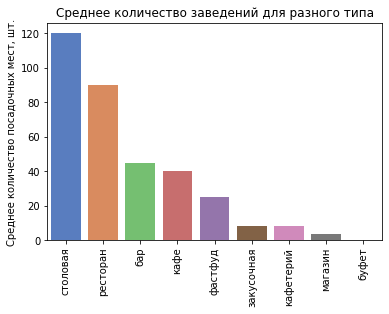

Количество филиалов для типа  закусочная : 56
Количество филиалов для типа  кафе : 1387
Количество филиалов для типа  фастфуд : 784
Количество филиалов для типа  ресторан : 541
Количество филиалов для типа  кафетерий : 51
Количество филиалов для типа  магазин : 78
Количество филиалов для типа  бар : 37
Количество филиалов для типа  буфет : 11
Количество филиалов для типа  столовая : 3


In [15]:
avg_data = data.query('chain=="да"').pivot_table(index='object_type',values='number',aggfunc='median').reset_index()
display(avg_data)
plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='object_type', y='number', data=avg_data.sort_values(by='number',ascending=False))
plt.xticks(rotation=90)
plt.title('Среднее количество заведений для разного типа')
plt.xlabel('')
plt.ylabel('Среднее количество посадочных мест, шт.')
plt.show()

for i in data.query('chain=="да"')['object_type'].unique():
    print('Количество филиалов для типа ',i,':',data.query('chain=="да" and object_type == @i')['id'].count())

Самое большое количество посадочных мест у заведения типа "столовая", однако таких всего 3 штуки, поэтому это вряд-ли показательно.

Также большое количество посадочных мест предоставляют рестораны (около 90) - таких заведений 541.

Самое малое количество посадочных мест предоставляют буфеты,а также магазины кулинарии. 

В сетевых заведениях фастфуда, в среднем, около 25 посадочных мест, в кафе около 40, в ресторанах около 90.

**Таким образом, предполодительно лучше всего открывать ресторан с вместимостью до 90 посадочных мест, кафе или фастфуд с вместимостью до 40 посадочных мест.**

Выделим улицу из адреса в отдельный столбец для дальнейшего анализа.


In [16]:
needed_word = {
    'улица',
    'переулок',
    'проезд',
    'набережная',
    'площадь',
    'бульвар',
    'аллея',
    'проспект',
    'шоссе',
    'тупик',
    'просека'
}

def find_street (row):
    for i in row.split(', '):
        if any(needed_word & set(i.split())):
            return i
data['street'] = data['address'].apply(find_street)

display(data.head())

,id,object_name,chain,object_type,address,number,format_category,street
0,223439,донер кебаб,нет,фастфуд,"город москва, ленинский проспект, дом 39/1",0,на вынос,ленинский проспект
1,223438,тандыр хачапури,нет,фастфуд,"город москва, ломоносовский проспект, дом 23а",3,есть посадочные места,ломоносовский проспект
2,223437,шаурма,нет,фастфуд,"город москва, ломоносовский проспект, владение...",0,на вынос,ломоносовский проспект
3,223436,донер кебаб,нет,фастфуд,"город москва, ломоносовский проспект, дом 19а",0,на вынос,ломоносовский проспект
4,223435,кофейня magic,нет,фастфуд,"город москва, болотниковская улица, дом 12",6,есть посадочные места,болотниковская улица


Для того что бы ответить на вопрос "в каких районах Москвы находятся эти улицы?" необходимо соотнести улицы и районы. Воспользуемся данными из открытых источников: https://hubofdata.ru/dataset/mosgaz-contacts 
Загрузим соотвествия улиц районам и будем присоединять к таблицам по мере необходимости. Все строки исходного датасета должны остаться в таблице, даже если не найдется совпадения в датасете df,поэтому используем левое соединение.


In [17]:

df = pd.read_csv('https://docs.google.com/spreadsheets/d/1BC4e64oMg91Pu-VDoIeIB7jSk0OKQmvWU1q7wbbZvtI/export?format=csv')
df['streetname'] = df['streetname'].str.lower()
df['area'] = df['area'].str.lower()
display(df)



,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,пресненский район
1,улица гашека,17,ЦАО,пресненский район
2,большая никитская улица,17,ЦАО,пресненский район
3,глубокий переулок,17,ЦАО,пресненский район
4,большой гнездниковский переулок,17,ЦАО,пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,пресненский район
4394,волков переулок,17,ЦАО,пресненский район
4395,поварская улица,17,ЦАО,пресненский район
4396,кудринская площадь,17,ЦАО,пресненский район


Посмотрим ТОП-10 улиц по количеству заведений. 

,street,id
0,проспект мира,196
1,профсоюзная улица,181
2,ленинградский проспект,172
3,пресненская набережная,165
4,варшавское шоссе,163
5,ленинский проспект,148
6,проспект вернадского,126
7,кутузовский проспект,114
8,каширское шоссе,110
9,кировоградская улица,107


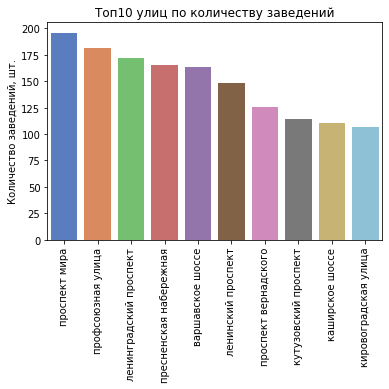

In [18]:

num_obj_onstreet = data.pivot_table(index='street',values='id',aggfunc='count').sort_values('id',ascending=False).reset_index().head(10)
display(num_obj_onstreet)
plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='street', y='id', data=num_obj_onstreet)
plt.xticks(rotation=90)
plt.title('Топ10 улиц по количеству заведений')
plt.xlabel('')
plt.ylabel('Количество заведений, шт.')
plt.show()


Проверим, не изменилось ли распределение разных типов заведений для улиц из ТОП10 относительно всей выборки, график распределения для которой строили ранее.

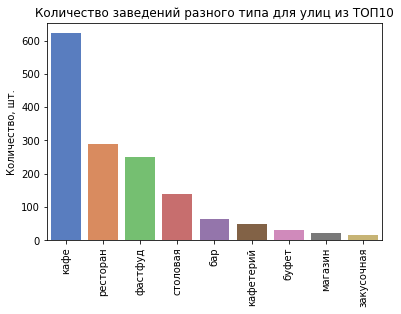

In [19]:
top10_street = num_obj_onstreet['street'].unique()
top10_street_slice = data[data['street'].isin(top10_street)]

plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='object_type', y='id', data=top10_street_slice.groupby('object_type')['id'].count().reset_index().sort_values(by='id',ascending=False))
plt.xticks(rotation=90)
plt.title('Количество заведений разного типа для улиц из ТОП10')
plt.xlabel('')
plt.ylabel('Количество, шт.')
plt.show()

Распределение практически не изменилось. Единственное отличие - на улицах из ТОП10 ожидаемо сократилось количество столовых. Также общее количество заведений снизилось почти в 2 раза. Это говорит о том, что всего на 10-ти улицах сосредоточена почти половина всех заведений! Это подтверждает верный выбор ТОП10 улиц. 

А теперь проанализируем, в каких районах они находятся? 

In [20]:
num_obj_onstreet_area = pd.merge(num_obj_onstreet,df[['streetname','area']],left_on='street',right_on='streetname',how='left')
display(num_obj_onstreet_area['area'].value_counts())

обручевский район                  2
донской район                      2
район нагатино-садовники           2
район гагаринский                  2
район теплый стан                  2
район чертаново центральное        2
район проспект вернадского         2
район тропарево-никулино           2
район чертаново южное              2
район чертаново северное           2
ломоносовский район                2
район северное бутово              1
район беговой                      1
район коньково                     1
район свиблово                     1
район аэропорт                     1
ярославский район                  1
район ростокино                    1
район южное бутово                 1
район марьина роща                 1
пресненский район                  1
останкинский район                 1
академический район                1
район москворечье-сабурово         1
район сокол                        1
нагорный район                     1
район орехово-борисово северное    1
а

Эти улицы находятся в районах:
- ломоносовский район                
- район гагаринский                  
- район нагатино-садовники           
- район теплый стан                                       
- обручевский район                  
- район проспект вернадского         
- донской район                      
- район тропарево-никулино
- район чертаново южное              
- район чертаново центральное         
- район чертаново северное           
- обручевский район                  


Найдем "заселенность" улиц заведениями. Предположительно, самые "заселенные" улицы и будут являться самыми песпективными. Для нахождения "заселенности" найдем длины улиц и посчитаем количество заведений на 1 км. Т.к. улиц всего десять, то найдем данные длин вручную на https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%83%D0%BB%D0%B8%D1%86_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B. 

In [21]:
num_obj_onstreet['street_lenght'] = [8.9,9.3,5.6,0.55,22.5,14,8,8.3,10.5,5]
num_obj_onstreet['density_koef'] = (num_obj_onstreet['id']/num_obj_onstreet['street_lenght']).round(0)
display(num_obj_onstreet.sort_values(by='density_koef',ascending=False))

,street,id,street_lenght,density_koef
3,пресненская набережная,165,0.55,300.0
2,ленинградский проспект,172,5.60,31.0
0,проспект мира,196,8.90,22.0
9,кировоградская улица,107,5.00,21.0
1,профсоюзная улица,181,9.30,19.0
6,проспект вернадского,126,8.00,16.0
7,кутузовский проспект,114,8.30,14.0
5,ленинский проспект,148,14.00,11.0
8,каширское шоссе,110,10.50,10.0
4,варшавское шоссе,163,22.50,7.0


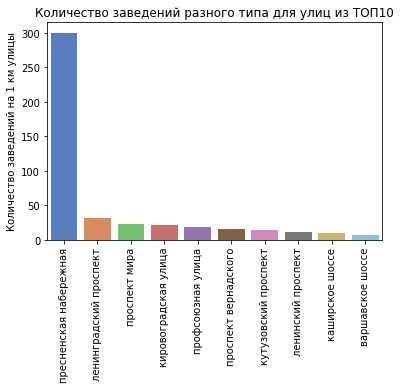

In [22]:
plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='street', y='density_koef', data=num_obj_onstreet.sort_values(by='density_koef',ascending=False))
plt.xticks(rotation=90)
plt.title('Количество заведений разного типа для улиц из ТОП10')
plt.xlabel('')
plt.ylabel('Количество заведений на 1 км улицы')
plt.show()

Пресненская набережная безусловный лидер по количеству заведний на 1 км. Не удивительно, это улица на которой располагается комплекс Москва-сити. Эта улица становиться одной из самых перспективных.

In [23]:
one_obj_onstreet = data.pivot_table(index='street',values='id',aggfunc='count').reset_index().sort_values('id',ascending=False).query('id==1')
one_obj_onstreet = pd.merge(one_obj_onstreet,df[['streetname','area']],left_on='street',right_on='streetname',how='left')
display(one_obj_onstreet)
display(one_obj_onstreet['area'].value_counts().head(20))

,street,id,streetname,area
0,авиационный переулок,1,авиационный переулок,район аэропорт
1,улица медиков,1,улица медиков,район царицыно
2,барабанный переулок,1,барабанный переулок,район соколиная гора
3,анненский проезд,1,анненский проезд,район марьина роща
4,аэрофлотская улица,1,аэрофлотская улица,район внуково
...,...,...,...,...
587,есенинский бульвар,1,есенинский бульвар,район кузьминки
588,улица академика понтрягина,1,улица академика понтрягина,район южное бутово
589,улица академика семёнова,1,улица академика семёнова,район южное бутово
590,елоховский проезд,1,елоховский проезд,басманный район


таганский район         27
район хамовники         26
басманный район         25
тверской район          20
пресненский район       20
район арбат             18
район марьина роща      18
мещанский район         16
район замоскворечье     14
район лефортово         12
район соколиная гора    12
даниловский район       11
район сокольники        11
район якиманка          10
красносельский район    10
район богородское       10
нижегородский район      9
район внуково            8
район люблино            8
можайский район          8
Name: area, dtype: int64

Улицы с ровно одним заведением чаще всего располагаются в районах (ТОП20):
- таганский район         
- район хамовники         
- басманный район         
- тверской район          
- пресненский район       
-  район арбат             
- район марьина роща      
- мещанский район         
- район замоскворечье     
- район соколиная гора    
- район лефортово         
- район сокольники        
- даниловский район       
-  красносельский район    
- район якиманка          
- район богородское       
- нижегородский район      
- можайский район          
- район южное бутово       
- район люблино                   

Количество районов, в которых есть улицы с только одним заведением сильно больше кол-ва районов, в которых много заведений. Вероятнее всего, большое скопление заведений неслучайно - малое количество заведений на улицах может быть обусловлено малой проходимостью. Лучше всего открыть заведения на оживленных улицах с большим количеством существующих заведений и на первом этапе оттянуть трафик от конкрутентов благодаря обслуживающим роботам, а в дальнейшем удержать трафик хорошей кухней и быстрым обслуживанием.

**Лучше всего открыть заведение на одной из улиц ТОП10:**
- проспект мира
- профсоюзная улица
- ленинградский проспект
- пресненская набережная
- варшавское шоссе
- ленинский проспект
- проспект вернадского
- кутузовский проспект
- каширское шоссе
- кировоградская улица

Самая перспективная улица - "пресненская набережная"

**Либо на улицах, смежных с улицами ТОП10 в районах:**

- ломоносовский район                
- район гагаринский                  
- район нагатино-садовники           
- район теплый стан                                       
- обручевский район                  
- район проспект вернадского         
- донской район                      
- район тропарево-никулино
- район чертаново южное              
- район чертаново центральное         
- район чертаново северное           
- обручевский район                  


Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. В качестве меры среднего возьмем медиану, т.к. она более устойчива к выбросам.

Также посмотрим на количество заведений разных типов на улицах из ТОП10. 

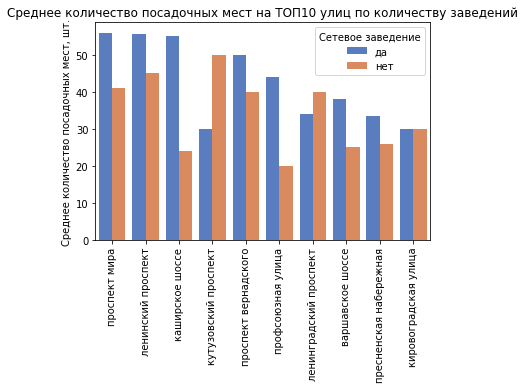

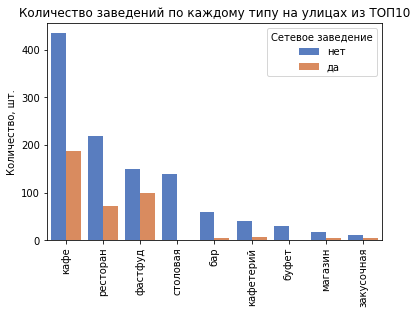

In [24]:



plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
fig = sns.barplot(x='street', y='number', data=top10_street_slice.pivot_table(index=['street','chain'],values='number',aggfunc='median').reset_index().sort_values(by='number',ascending=False),hue='chain')
plt.xticks(rotation=90)
plt.title('Среднее количество посадочных мест на ТОП10 улиц по количеству заведений')
plt.legend(title='Сетевое заведение')
plt.xlabel('')
plt.ylabel('Среднее количество посадочных мест, шт.')
plt.show()



plt.figure(
    figsize=(6, 4)
)
sns.set_palette('muted') 
sns.barplot(
    x='object_type',
    y='id',
    data=top10_street_slice.pivot_table(index=['object_type','chain'],aggfunc='count',values='id').reset_index().sort_values(by='id',ascending=False),
    hue='chain'
)
plt.xticks(rotation=90)
plt.title('Количество заведений по каждому типу на улицах из ТОП10')
plt.xlabel('')
plt.legend(title='Сетевое заведение')
plt.ylabel('Количество, шт.')
plt.show()

Как и было установлено ранее - лучше открывать заведение со средним количеством посадочных мест до 40 шт. 

Интересно, что сетевые заведения почти на всех улицах имеют большее количество посадочных мест. Скорее всего это связано с охватом и и узнаваемостью бренда. 

Результаты  говорят о двух подходах развития сети: 

1) Открытие большого количества филиалов с минимальных количеством посадочных мест (очевидно влияние фаст-фуда или еды на вынос из кафе). Сетей открытых по данной схеме большинство. Однако такой подход не подойдет для открываемого заведения ввиду высокой стоимости открытия. 

2) Открытие небольшой сети с большим количеством посадочных мест. Сетей открытых по данной схеме мало, но, вероятнее, она подойдет для нашего заведения. А благодаря роботам мы, наверное, сможем увеличить скорость обслуживания посетителей, а значит увеличить проходимость заведения за день, что положительно скажется на выручке.

**После повышения лояльности посетителей открываемого заведения можно будет расширить сеть и увеличить количество посадочных мест.**

На улице "Волгоградский проспект" практически в 2 раза выше среднее количество посадочных мест для сетевых заведений. Скорее всего на этой улице располагаются крупные известные сетевые заведения.  

**При выборе местоположения открываемого заведения рекомендуется в первую очередь изучить улицу "пресненская набережная" - вероятно, это самая перспективная улица для открытия заведения из-за большого трафика**

Также подтвердилось предположение о том, что открывать лучше всего заведение типа "кафе", "ресторан" и "фастфуд". Столовую не рассматриваем из-за специфики открытия нового заведения (однако, окончательное решение само собой остается за заказчиком). 

### Вывод
Анализ завершен, все интересующие заказчика вопросы изучены. Рекомендации будут сформированы в итоговом выводе.

## Итоговый вывод

ТОП4 заведений по их количеству:
- "Кафе". Количество заведений: ~ 6000 шт
- "Столовые". Количество заведений: ~ 2500 шт
- "Рестораны". Количество заведений:~ 2200 шт
- "фастфуд (предприятие быстрого обслуживания)". Количество заведений: ~ 2000 шт

Рестораны предоставляют, в среднем, до 90 посадочных мест. Кафе, фастфуд или бары до 40 посадочных мест. 

**Наиболее характерно для сетевых заведений наличие среднего количества филиалов (от 2 до 8) и среднее количество посадочных мест (от 20 до 85). Предположительно, это оптимальный вариант дляразвития сети** 

Количество районов, в которых есть улицы с только одинм заведением сильно больше кол-ва районов, в которых много заведений (504 шт против 55 соотвественно) . Вероятнее всего, большое скопление заведений неслучайно - малое количество заведений на улицах может быть обусловлено малой проходимостью. 

ТОП10 улиц по количеству заведений:
- проспект мира	
- варшавское шоссе	
- ленинский проспект	
- профсоюзная улица	
- дмитровское шоссе	
- ленинградский проспект	
- проспект вернадского	
- ленинградское шоссе	
- волгоградский проспект	
- каширское шоссе	

Районы улиц из ТОП10 с большим количеством заведений:

- ломоносовский район                
- район гагаринский                  
- район нагатино-садовники           
- район теплый стан                  
- район сокол                        
- обручевский район                  
- район проспект вернадского         
- донской район                      
- район тропарево-никулино


**Будет ли достаточной посещаемость кафе в долгой перспективе, после спада первоначального интереса?**

 - Да, если открыть заведение на улицах из ТОП10 выше, либо смежных с ними. На первом этапе можно оттянуть трафик от конкрутентов благодаря интересу посетителей к обслуживанию роботами, а в дальнейшем удержать трафик хорошей кухней и быстрым обслуживанием.


**Рекомендации заказчику:**

 1) Какое место расположения будет самым перспективным
 
    Рекомендуется открыть заведение на одной из улиц ТОП10:
    - проспект мира
    - профсоюзная улица
    - ленинградский проспект
    - пресненская набережная
    - варшавское шоссе
    - ленинский проспект
    - проспект вернадского
    - кутузовский проспект
    - каширское шоссе
    - кировоградская улица

    Самая перспективная улица - "пресненская набережная"

    Также можно обратить внимание на улицы, смежные с улицами ТОП10 в районах:

    - ломоносовский район                
    - район гагаринский                  
    - район нагатино-садовники           
    - район теплый стан                                       
    - обручевский район                  
    - район проспект вернадского         
    - донской район                      
    - район тропарево-никулино
    - район чертаново южное              
    - район чертаново центральное         
    - район чертаново северное           
    - обручевский район              
 
     При выборе местоположения открываемого заведения рекомендуется в первую очередь изучить улицу "пресненская набережная" - вероятно, это самая перспективная улица для открытия заведения из-за большого трафика
     
 
 2) Заведение какого вида будут самыми перспективными
 
     Рекомендуется открывать заведение типа "Кафе", "Ресторан", "Фастфуд". Заведение типа "столовая" предлагается не рассматривать для открытия из-за несовпадения формата столовой и специфики открываемого заведения и более долгой оккупаемости за счет, предположительно, более низкого среднего чека.
 
 3) Какое количество посадочных мест в кафе будет оптимальным
    
    Рекомендуется открывать заведение с количеством посадочных мест до 40 шт.
 
 4) Рекомендации по развитию сети:
     После повышения лояльности посетителей к бренду заведения можно будет расширить сеть одним или несколькими филиалами и увеличить в них количество посадочных мест до 50-60.
     Оптимальным вариантом развитой сети может стать : от 2 до 8 филиалов, с количеством посадочных мест от 20 до 85 

 5) Для более качественных результатов анализа рекомендуется собрать данные о посещаемости и финансовому результату заведений наиболее подходящих по формату к открываемому и находящихся на улицах из ТОП10 по количеству заведений. Также проверить, есть ли возможность из используемого источника исходных данных получить год, за который указаны соотвествующие измерения. 
 
 Ссылка на презентацию: https://drive.google.com/file/d/1rRG8_lxGM7H4m_A6s1JZTb4bqomDHG9Y/view?usp=sharing